# 支持向量機 Support Vector Machine (SVM)

## 什麼是支持向量機？
- 以下圖為例，我們要在這個二維平面上找到一條線可以把兩組資料分開，SVM算法就是為了幫我們找到最佳的直線
- 這條直線滿足了以下特性：
    - 與紅組和綠組有最大的間隔
    - 找到紅點距離這條線最近的點和綠點距離這條線最近的點，並讓這兩點與這條線有最大的距離(也就是找到這兩點的垂直平分線)
    - 也就是找到紅組以及綠組的與這條線的最短距離，這兩個距離的最小值的最大值0.0
- 為什麼叫做"支持"？
    - 這兩個點就是"支持向量"，因為紅組和綠組中的其他的點，並不會直接影響到這條線，而是由這兩個最近的點所支持起來的
- 為什麼叫做"向量"？
    - 在高維空間中，我們無法用幾何或直觀的方式把向量表示出來，但SVM在高維空間也是可以運用的
    - 所以這些點就都是稱為向量
- 最大間隔超平面
    - 在二維空間裡，超平面就是一條直線；三維空間裡，超平面就一個面
    - 超平面就是一個比我們數據空間少一維的空間
![hyperplane](hyperplane.png)

## 支持向量機有什麼特別的？
- 數據空間中，一種特徵就是一種維度，特徵相近的數據就會分在同一類
- 從下圖為例，我們有蘋果和橘子兩類數據，X1可能代表顏色這個特徵，X1越大就越黃、X!越小就是紅色和綠色
- SVM算法會找到最特殊、最奇怪的個體：這一類中特徵最接近另一類的點，就會成為支持向量
- 我們就是通過最極端的個體，來找出分類邊界(超平面)
- 跟其他分類算法比較不一樣，通常每個個體都有各自的權重(1/N)，而不像SVM算法主要受某一個體所影響
### 一般的個體
![svm_normal](svm_normal.png)
### 極端的個體
![svm_special](svm_special.png)

In [1]:
# Support Vector Machine (SVM)
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

建立分類器的實體，只要設定兩個參數
- kernal 可以設定SVM的核，這邊使用的是最簡單的線性核，不同的核會影響分類器的效能，例如高斯核(rbf)、多項式核(poly)
- random_state 可產生相同之結果

In [33]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)#poly、rbf
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

從混淆矩陣可以看出測試集的100筆數據中，有10筆的預測結果有誤，與邏輯回歸分類器的結果差不多

In [36]:
cm

array([[66,  2],
       [ 8, 24]])

從圖上看來，SVM分類器的分類邊界也是一條直線，是因為我的選擇的是線性核，所以結果與邏輯回歸相近，若我們能將分類邊界改為弧形，效能應該會大大提升

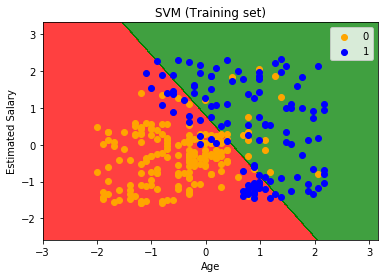

In [37]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

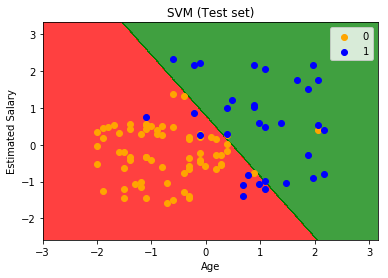

In [38]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()